In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [82]:
cd = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Clustering/crime_data.csv")

In [11]:
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
crd = cd.drop(['Unnamed: 0'],axis=1)
crd

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [13]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [16]:
from sklearn import preprocessing
crd_norm = preprocessing.normalize(crd)
crd_norm

array([[0.05403139, 0.96601575, 0.23741065, 0.08677769],
       [0.0368722 , 0.96973889, 0.17698657, 0.1640813 ],
       [0.02643862, 0.95962381, 0.26112213, 0.10118482],
       [0.04452761, 0.9613916 , 0.25299779, 0.09866914],
       [0.03065655, 0.94013412, 0.30997176, 0.13829509],
       [0.03559422, 0.91914181, 0.35143658, 0.17436661],
       [0.02448606, 0.81620208, 0.57134146, 0.08236221],
       [0.02367351, 0.95496538, 0.28889709, 0.06339686],
       [0.04447826, 0.96754652, 0.23105589, 0.09213353],
       [0.07853358, 0.95233247, 0.27080544, 0.11644634],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277],
       [0.01964047, 0.90648301, 0.40791735, 0.10726716],
       [0.03942842, 0.94400732, 0.31466911, 0.09098866],
       [0.05444736, 0.85452107, 0.49153867, 0.1588048 ],
       [0.02725092, 0.69365977, 0.70604655, 0.13997063],
       [0.04479483, 0.85856764, 0.49274317, 0.1343845 ],
       [0.07934635, 0.89162397, 0.42536189, 0.13333459],
       [0.0594568 , 0.96134697,

## Hierarchial Clustering

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

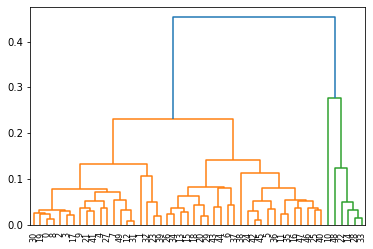

In [18]:
dendrogram = sch.dendrogram(sch.linkage(crd_norm,method='average'))

In [21]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
crd_hc = hc.fit_predict(crd_norm)

In [51]:
clusters = pd.DataFrame(crd_hc,columns=['Clusters'])

In [52]:
cd['HC Clusters ID'] = clusters

In [53]:
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,HC Clusters ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


## KMeans Clustering

In [28]:
from sklearn.cluster import KMeans

C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


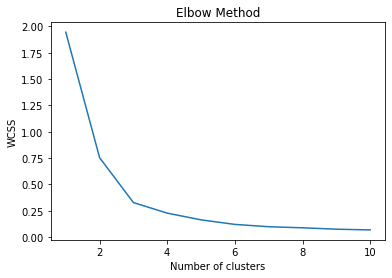

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crd_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
k_clusters = KMeans(5,random_state=40)
k_clusters.fit(crd_norm)

KMeans(n_clusters=5, random_state=40)

In [57]:
k_clusters.labels_

array([0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 3, 0, 1, 4, 1, 3, 0, 1, 0, 1, 0,
       4, 0, 3, 3, 1, 0, 4, 1, 0, 0, 0, 4, 1, 3, 3, 1, 3, 0, 3, 0, 3, 1,
       1, 3, 3, 3, 4, 3])

In [86]:
cd1 = cd

In [81]:
cd1['KM Clusters'] = k_clusters.labels_
cd1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,KM Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


## DBSCAN Clustering

In [60]:
from sklearn.cluster import DBSCAN

In [92]:
dbscan = DBSCAN(eps=0.1,min_samples=5)
db_Clusters = dbscan.fit(crd_norm)

In [93]:
db_Clusters.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
      dtype=int64)

In [94]:
cd2 = cd

In [95]:
cd2['dbscan Clusters ID'] = db_Clusters.labels_

In [96]:
cd2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,dbscan Clusters ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
